# 잡케어추천알고리즘경진대회

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
sub_1=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/sample_submission.csv")
test=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/test.csv", parse_dates=["contents_open_dt"])
train=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/train.csv", parse_dates=["contents_open_dt"])
D=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_D_코드.csv")
H=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_H_코드.csv")
L=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_L_코드.csv")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


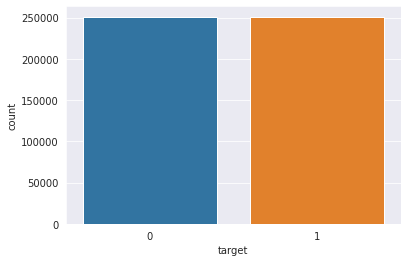

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.countplot(train["target"])

In [ ]:
train["target"].value_counts()

0    251106
1    250845
Name: target, dtype: int64

In [ ]:
print(f"train의 칼럼의 갯수는 {len(train.columns)} 입니다.")

train의 칼럼의 갯수는 35 입니다.


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      501951 non-null  int64         
 1   d_l_match_yn            501951 non-null  bool          
 2   d_m_match_yn            501951 non-null  bool          
 3   d_s_match_yn            501951 non-null  bool          
 4   h_l_match_yn            501951 non-null  bool          
 5   h_m_match_yn            501951 non-null  bool          
 6   h_s_match_yn            501951 non-null  bool          
 7   person_attribute_a      501951 non-null  int64         
 8   person_attribute_a_1    501951 non-null  int64         
 9   person_attribute_b      501951 non-null  int64         
 10  person_prefer_c         501951 non-null  int64         
 11  person_prefer_d_1       501951 non-null  int64         
 12  person_prefer_d_2       501951

**결측치 확인**

In [ ]:
print(train.isna().sum())
print(test.isna().sum())
print(D.isna().sum())
print(H.isna().sum())
print(L.isna().sum())

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
target                    0
dtype: int64
id     

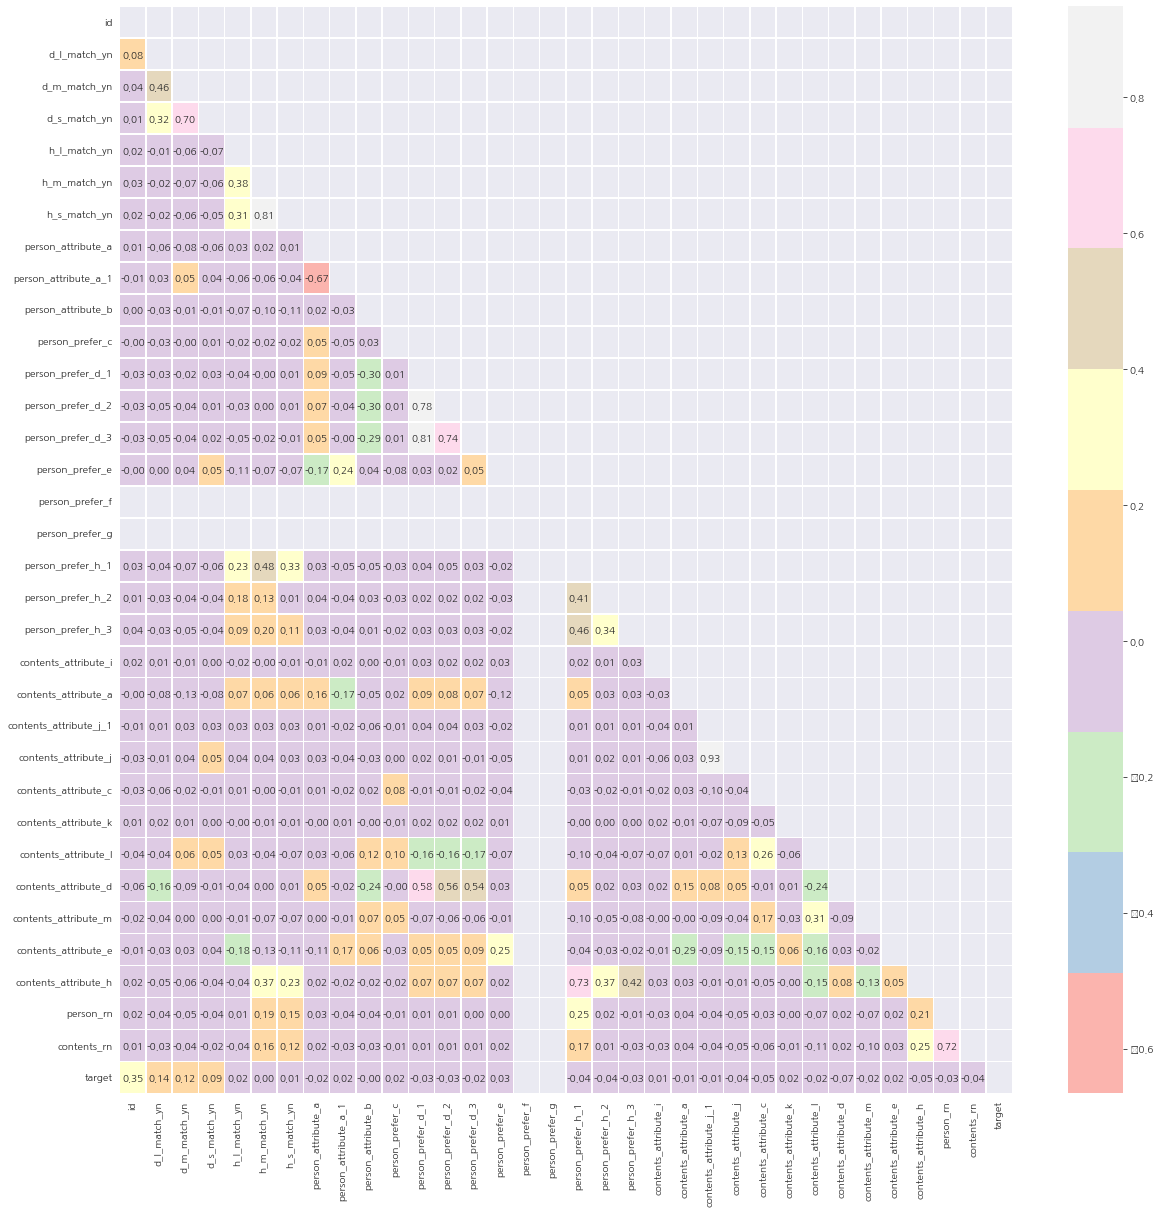

In [ ]:
import numpy as np
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(20,20))
mask = np.zeros_like(train.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=train.corr(), mask=mask, annot=True, fmt ='.2f', linewidths=.5, cmap='Pastel1')
plt.show()

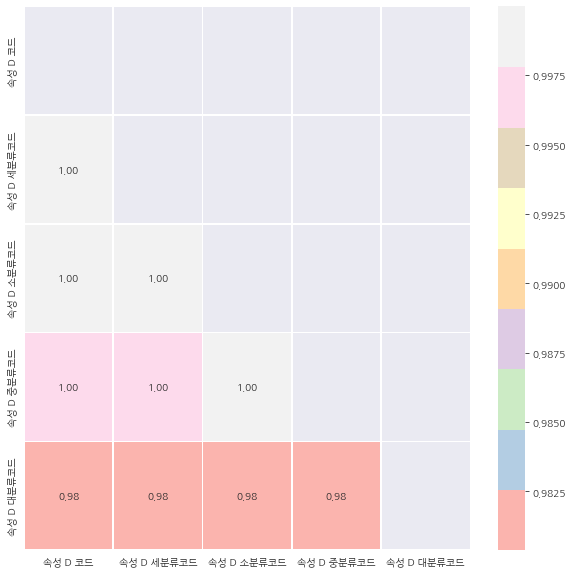

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10,10))
mask = np.zeros_like(D.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=D.corr(), mask=mask, annot=True, fmt ='.2f', linewidths=.5, cmap='Pastel1')
plt.show()

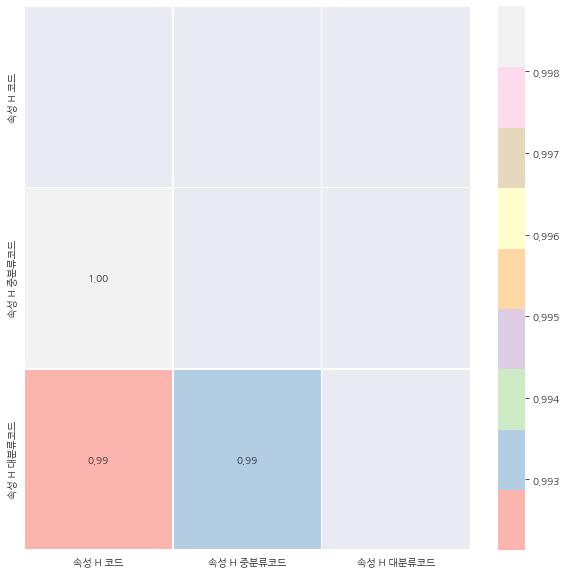

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10,10))
mask = np.zeros_like(H.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=H.corr(), mask=mask, annot=True, fmt ='.2f', linewidths=.5, cmap='Pastel1')
plt.show()

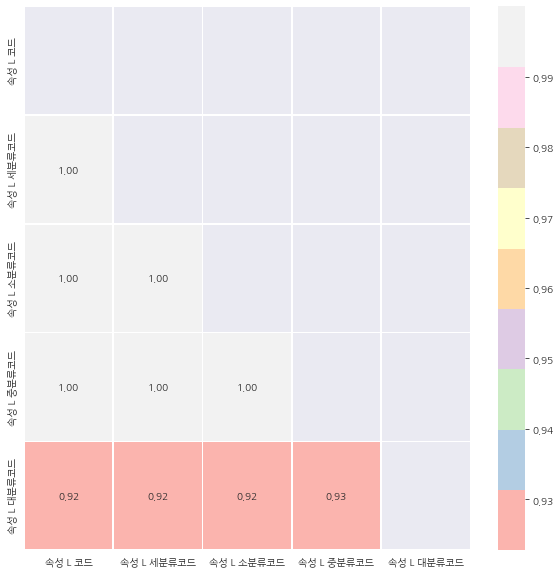

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10,10))
mask = np.zeros_like(L.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=L.corr(), mask=mask, annot=True, fmt ='.2f', linewidths=.5, cmap='Pastel1')
plt.show()

In [ ]:
train

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,False,False,False,True,False,False,1,1,2,2,1192,935,1228,3,1,1,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1
501947,501947,True,True,False,True,False,False,1,6,2,1,118,113,110,4,1,1,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1
501948,501948,True,True,True,True,False,False,1,7,4,1,147,46,145,4,1,1,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1
501949,501949,True,False,False,True,False,False,1,1,2,1,46,147,145,4,1,1,251,49,258,3,2,5,1,1,2,660,147,3,4,259,456330,273797,2020-06-15 09:23:21,1


## 속성 분류 EDA

match_yn 확인해보기

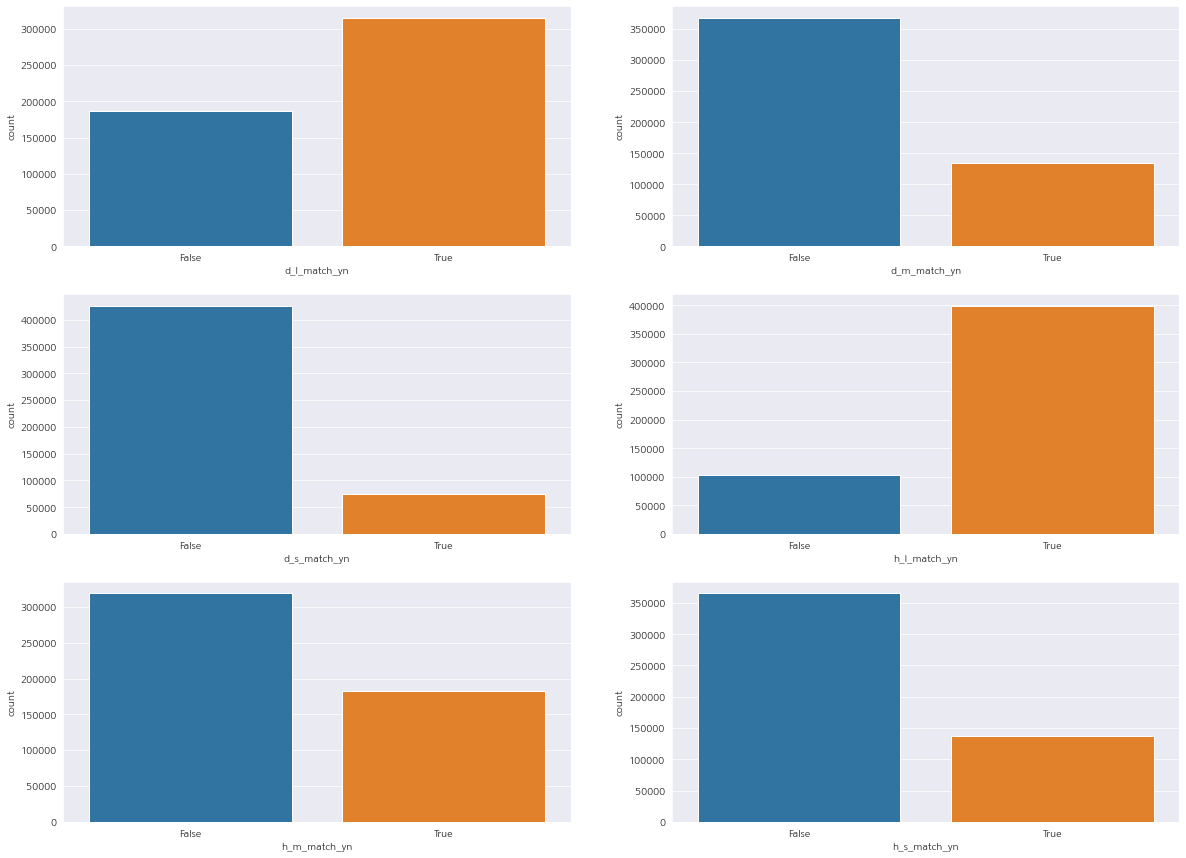

In [ ]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) =plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(20,15)

sns.countplot(train['d_l_match_yn'], ax=ax1)
sns.countplot(train['d_m_match_yn'], ax=ax2)

sns.countplot(train['d_s_match_yn'], ax=ax3)
sns.countplot(train['h_l_match_yn'], ax=ax4)

sns.countplot(train['h_m_match_yn'], ax=ax5)
sns.countplot(train['h_s_match_yn'], ax=ax6)


sns.set_style("darkgrid")

In [ ]:
train['d_l_match_yn']=train['d_l_match_yn'].apply(lambda x:"T" if x==True else "F" )

In [ ]:
train['d_m_match_yn']=train['d_m_match_yn'].apply(lambda x:"T" if x==True else "F" )
train['d_s_match_yn']=train['d_s_match_yn'].apply(lambda x:"T" if x==True else "F")
train['h_l_match_yn']=train['h_l_match_yn'].apply(lambda x:"T" if x==True else "F")
train['h_m_match_yn']=train['h_m_match_yn'].apply(lambda x:"T" if x==True else "F")
train['h_s_match_yn']=train['h_s_match_yn'].apply(lambda x:"T" if x==True else "F")

In [ ]:
train["match_yn"]=train['d_l_match_yn']+train['d_m_match_yn']+train["d_s_match_yn"]+train['h_l_match_yn']+train['h_m_match_yn']+train['h_s_match_yn']

In [ ]:
len(train['match_yn'].unique())

16

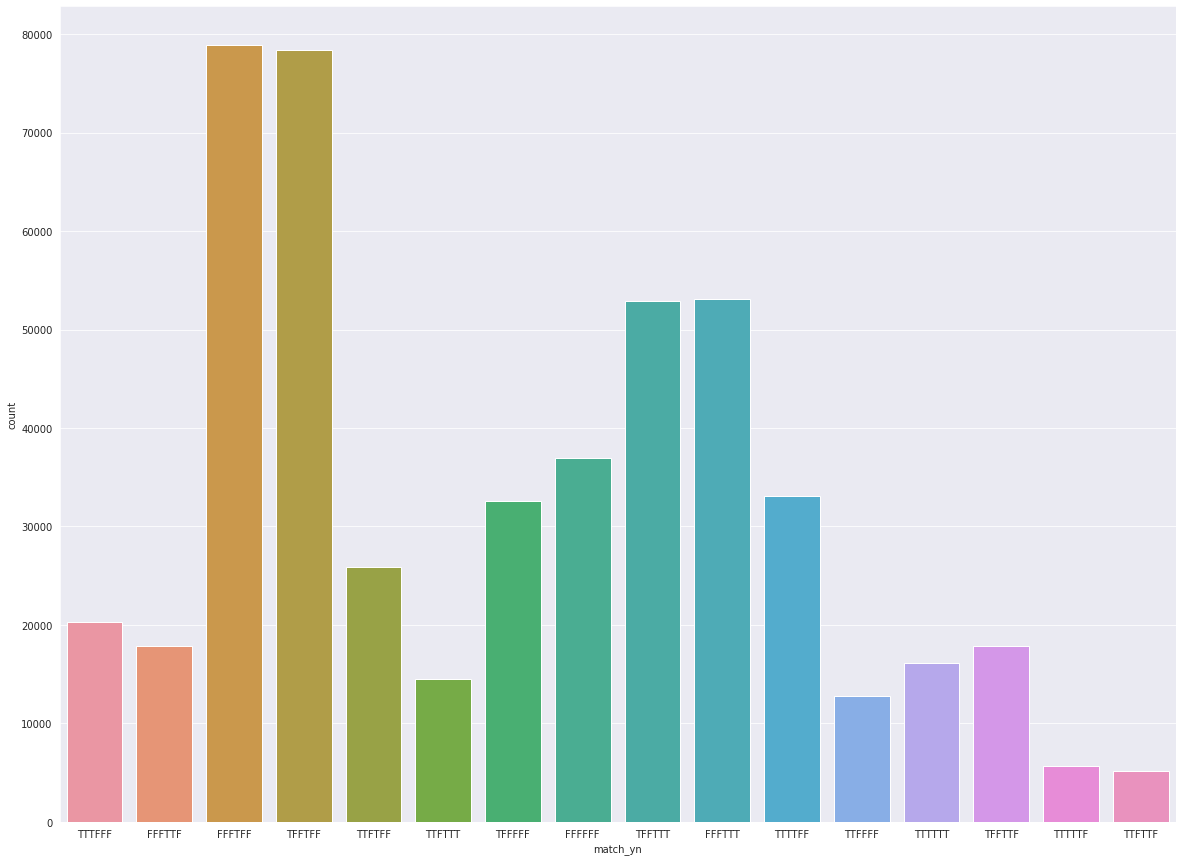

In [ ]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,15)

sns.countplot(train["match_yn"])

**대분류, 세분류, 코드매칭 여부 순**

- 64가지 유형중에 16가지 유형만 존재

- FFF / TFF 와 TFF / TFF 유형이 가장 많음

- 대분류는 T인데, 세분류와 코드가 F인 경우가 많음 

In [ ]:
train["match_yn_d"]=0
train["match_yn_h"]=0

train["match_yn_h"]=train['h_l_match_yn']+train['h_m_match_yn']+train['h_s_match_yn']
train["match_yn_d"]=train['d_l_match_yn']+train['d_m_match_yn']+train["d_s_match_yn"]

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'match_yn_h')]

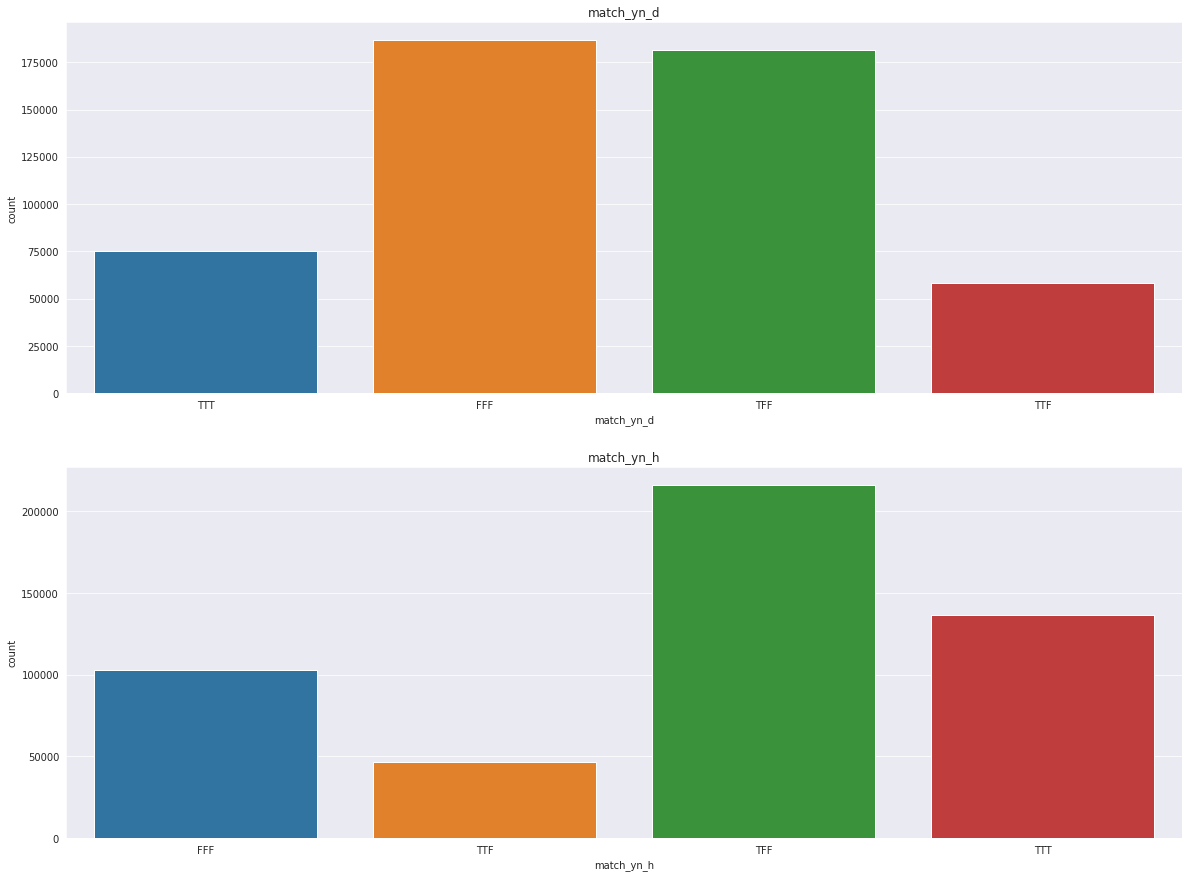

In [ ]:
figure, ((ax1), (ax2)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,15)

sns.countplot(train["match_yn_d"], ax=ax1)
sns.countplot(train["match_yn_h"], ax=ax2)

ax1.set(ylabel='count', title ="match_yn_d")
ax2.set(ylabel='count', title ="match_yn_h")

**대분류, 세분류, 코드매칭 여부 순**

- 속성분류 D의 경우, FFF가 가장 많으며, TFF가 그 다음으로 많음

- 속성분류 H의 경우, TFF가 가장 많으며, TTT가 그 다음으로 많음

## 회원 속성

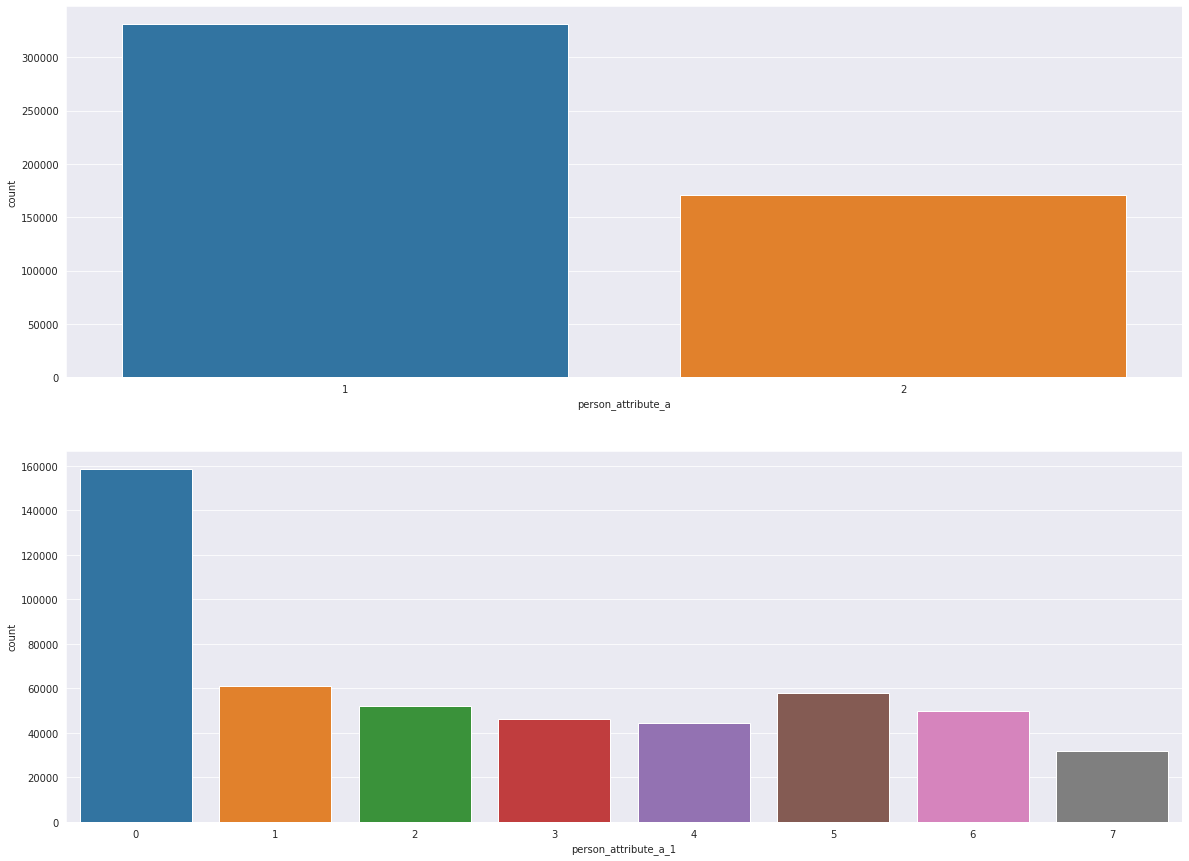

In [ ]:
figure, (ax1, ax2) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,15)

sns.countplot(train["person_attribute_a"], ax=ax1)
sns.countplot(train["person_attribute_a_1"], ax=ax2)

-  person_attribute_a :  회원 속성 A

- person_attribute_a_1 :  회원 속성 A 하위 속성 1

In [ ]:
p1=train.loc[train["person_attribute_a"]==1]
p2=train.loc[train["person_attribute_a"]==2]

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'person_attribute_a==2')]

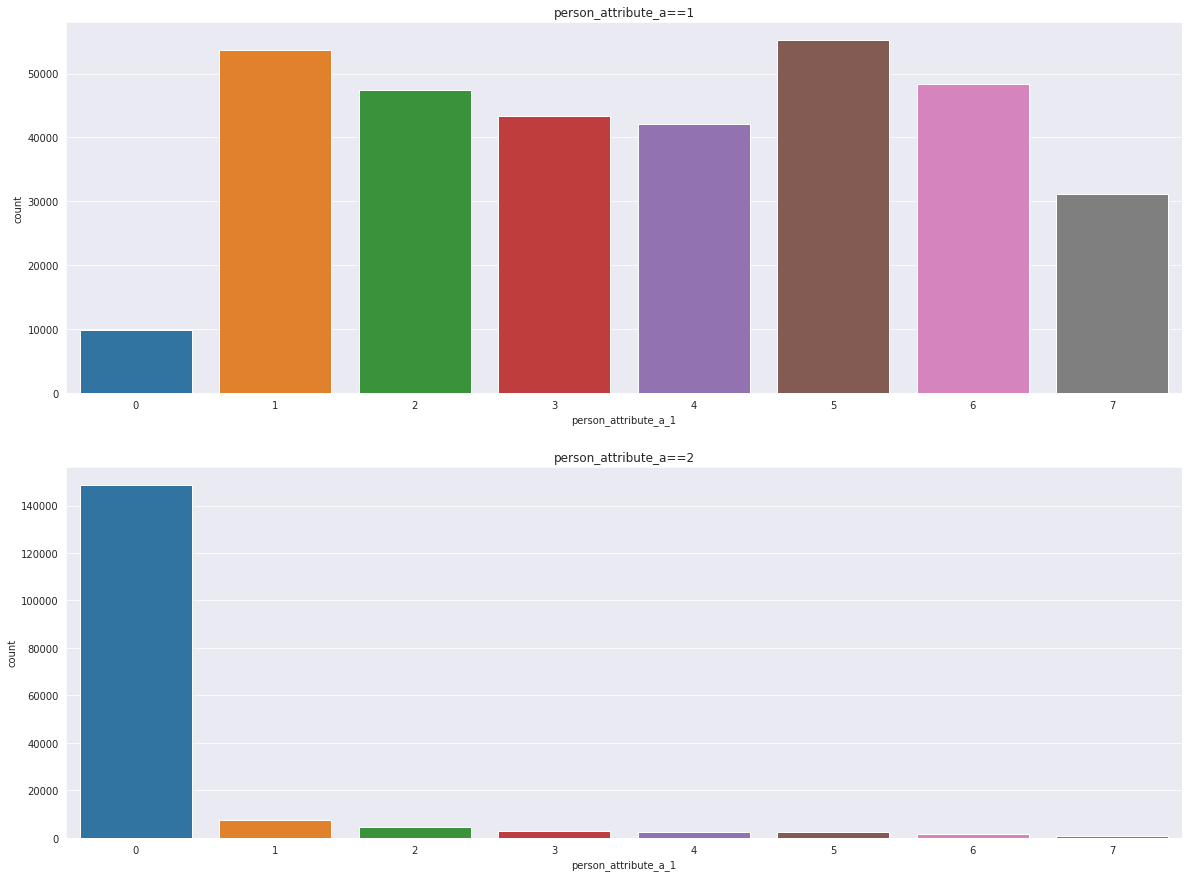

In [ ]:
figure, (ax1, ax2) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,15)

sns.countplot(p1["person_attribute_a_1"], ax=ax1)
sns.countplot(p2["person_attribute_a_1"], ax=ax2)

ax1.set(ylabel='count', title ="person_attribute_a==1")
ax2.set(ylabel='count', title ="person_attribute_a==2")

- person_attribute_a==1 인 경우는 회원 하위 속성이 골고루 퍼져 있는 반면에, person_attribute_a==2 인 경우는 회원 하위 속성이 대부분 0에 치우쳐 있음

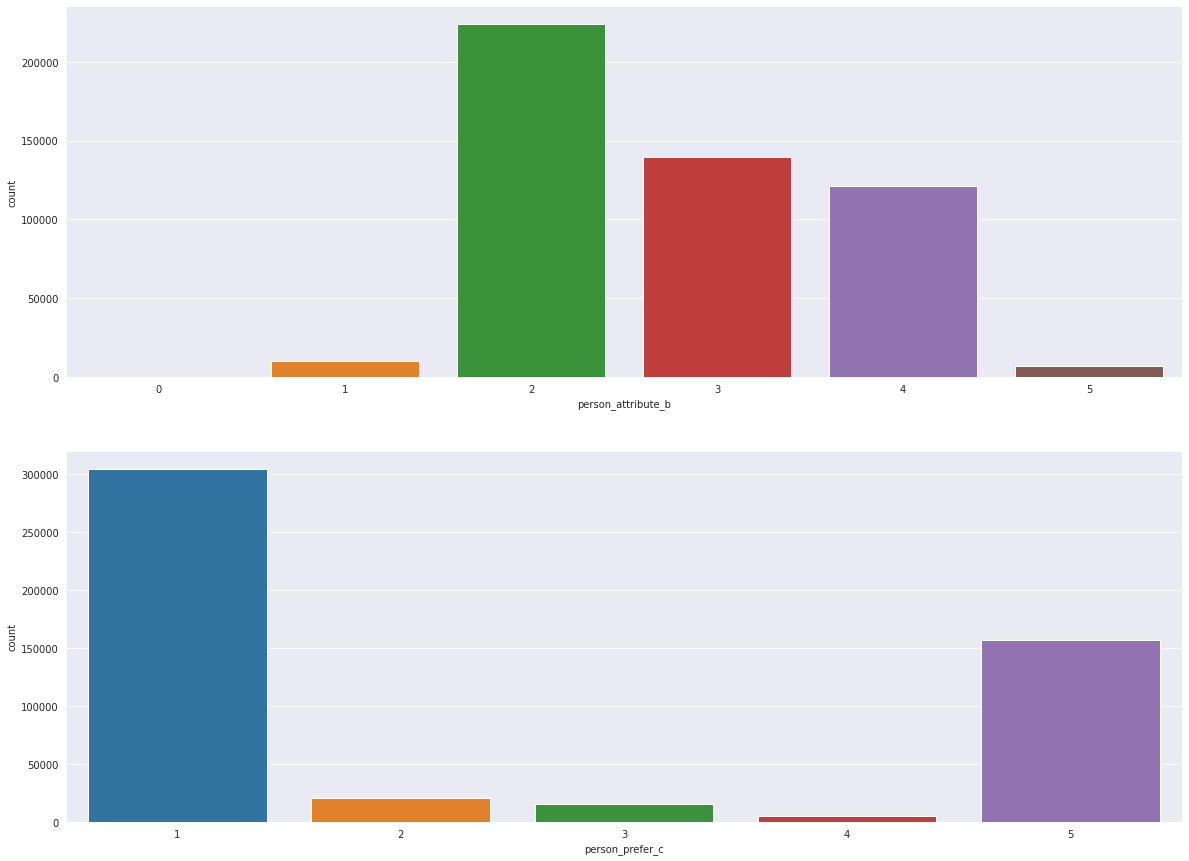

In [ ]:
figure, (ax1, ax2) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,15)

sns.countplot(train["person_attribute_b"], ax=ax1)
sns.countplot(train["person_prefer_c"], ax=ax2)

- person_attribute_b :  회원 속성 B

- person_prefer_c :  회원 선호 속성 C

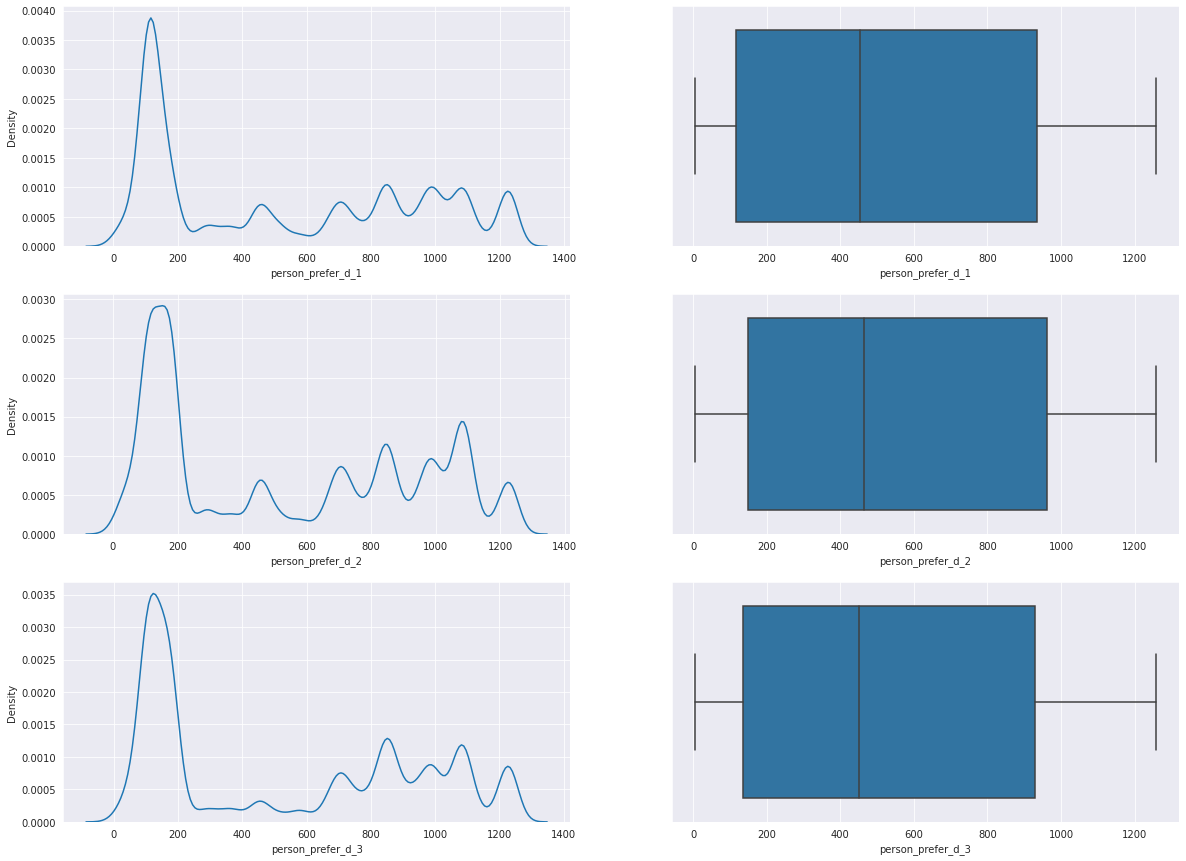

In [ ]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) =plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(20,15)

sns.kdeplot(train["person_prefer_d_1"], ax=ax1)
sns.boxplot(train["person_prefer_d_1"], ax=ax2)
sns.kdeplot(train["person_prefer_d_2"], ax=ax3)
sns.boxplot(train["person_prefer_d_2"], ax=ax4)
sns.kdeplot(train["person_prefer_d_3"], ax=ax5)
sns.boxplot(train["person_prefer_d_3"], ax=ax6)

- person_prefer_d_1 :  회원 선호 속성 D 1번

- person_prefer_d_2 :  회원 선호 속성 D 2번

- person_prefer_d_3 :  회원 선호 속성 D 3번

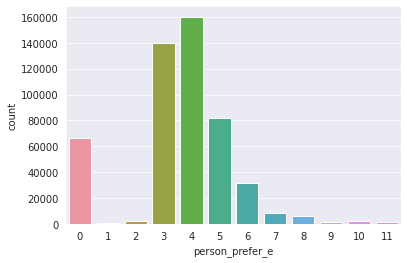

In [ ]:
sns.countplot(train["person_prefer_e"])

- person_prefer_e :  회원 선호 속성 E

In [ ]:
print(train["person_prefer_f"].unique()), print(train["person_prefer_g"].unique())

[1]
[1]


(None, None)

- 회원 선호 속성 F와 G의 경우 전부 1이다.

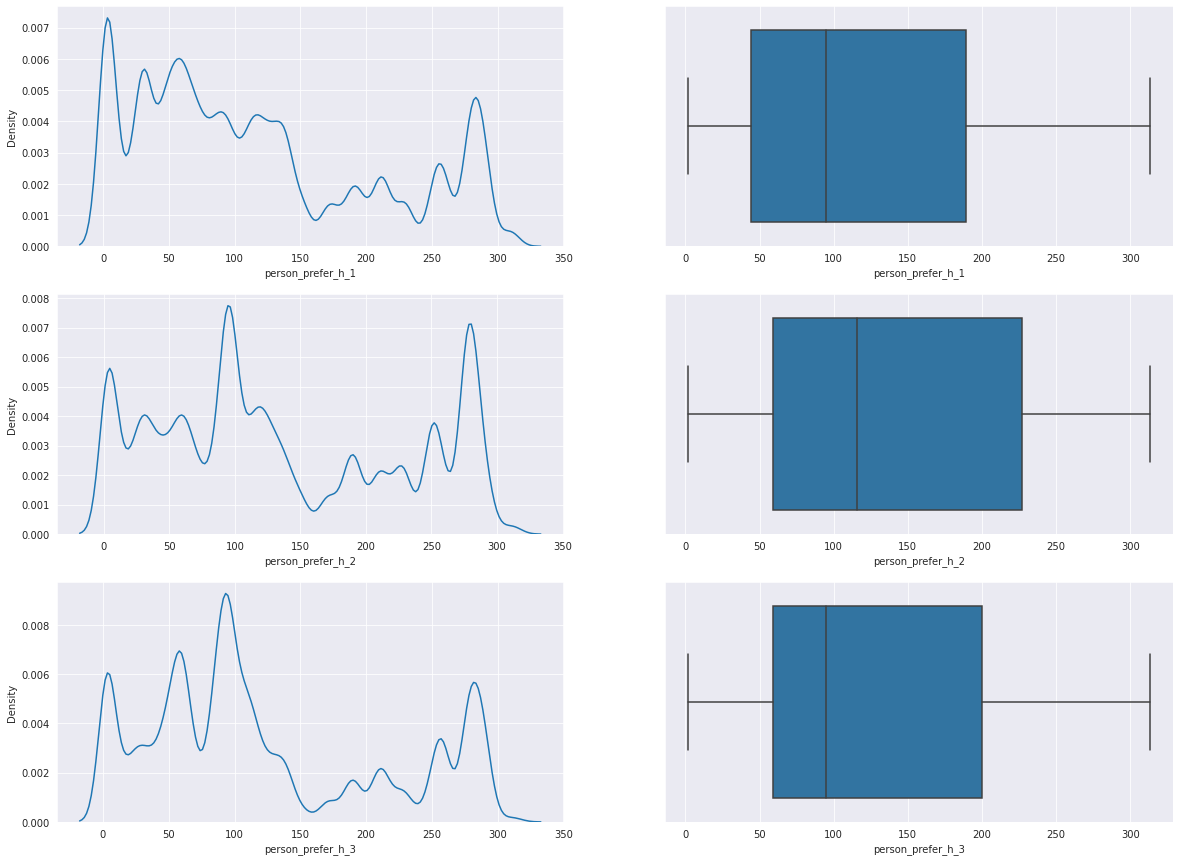

In [ ]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) =plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(20,15)

sns.kdeplot(train["person_prefer_h_1"], ax=ax1)
sns.boxplot(train["person_prefer_h_1"], ax=ax2)

sns.kdeplot(train["person_prefer_h_2"], ax=ax3)
sns.boxplot(train["person_prefer_h_2"], ax=ax4)

sns.kdeplot(train["person_prefer_h_3"], ax=ax5)
sns.boxplot(train["person_prefer_h_3"], ax=ax6)

- person_prefer_h_1 :  회원 선호 속성 H 1번

- person_prefer_h_2 :  회원 선호 속성 H 2번

- person_prefer_h_3 :  회원 선호 속성 H 3번

## 컨텐츠 속성

In [ ]:
train["contents_attribute_i"].unique()

array([3, 1, 2])

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'contents_attribute_e')]

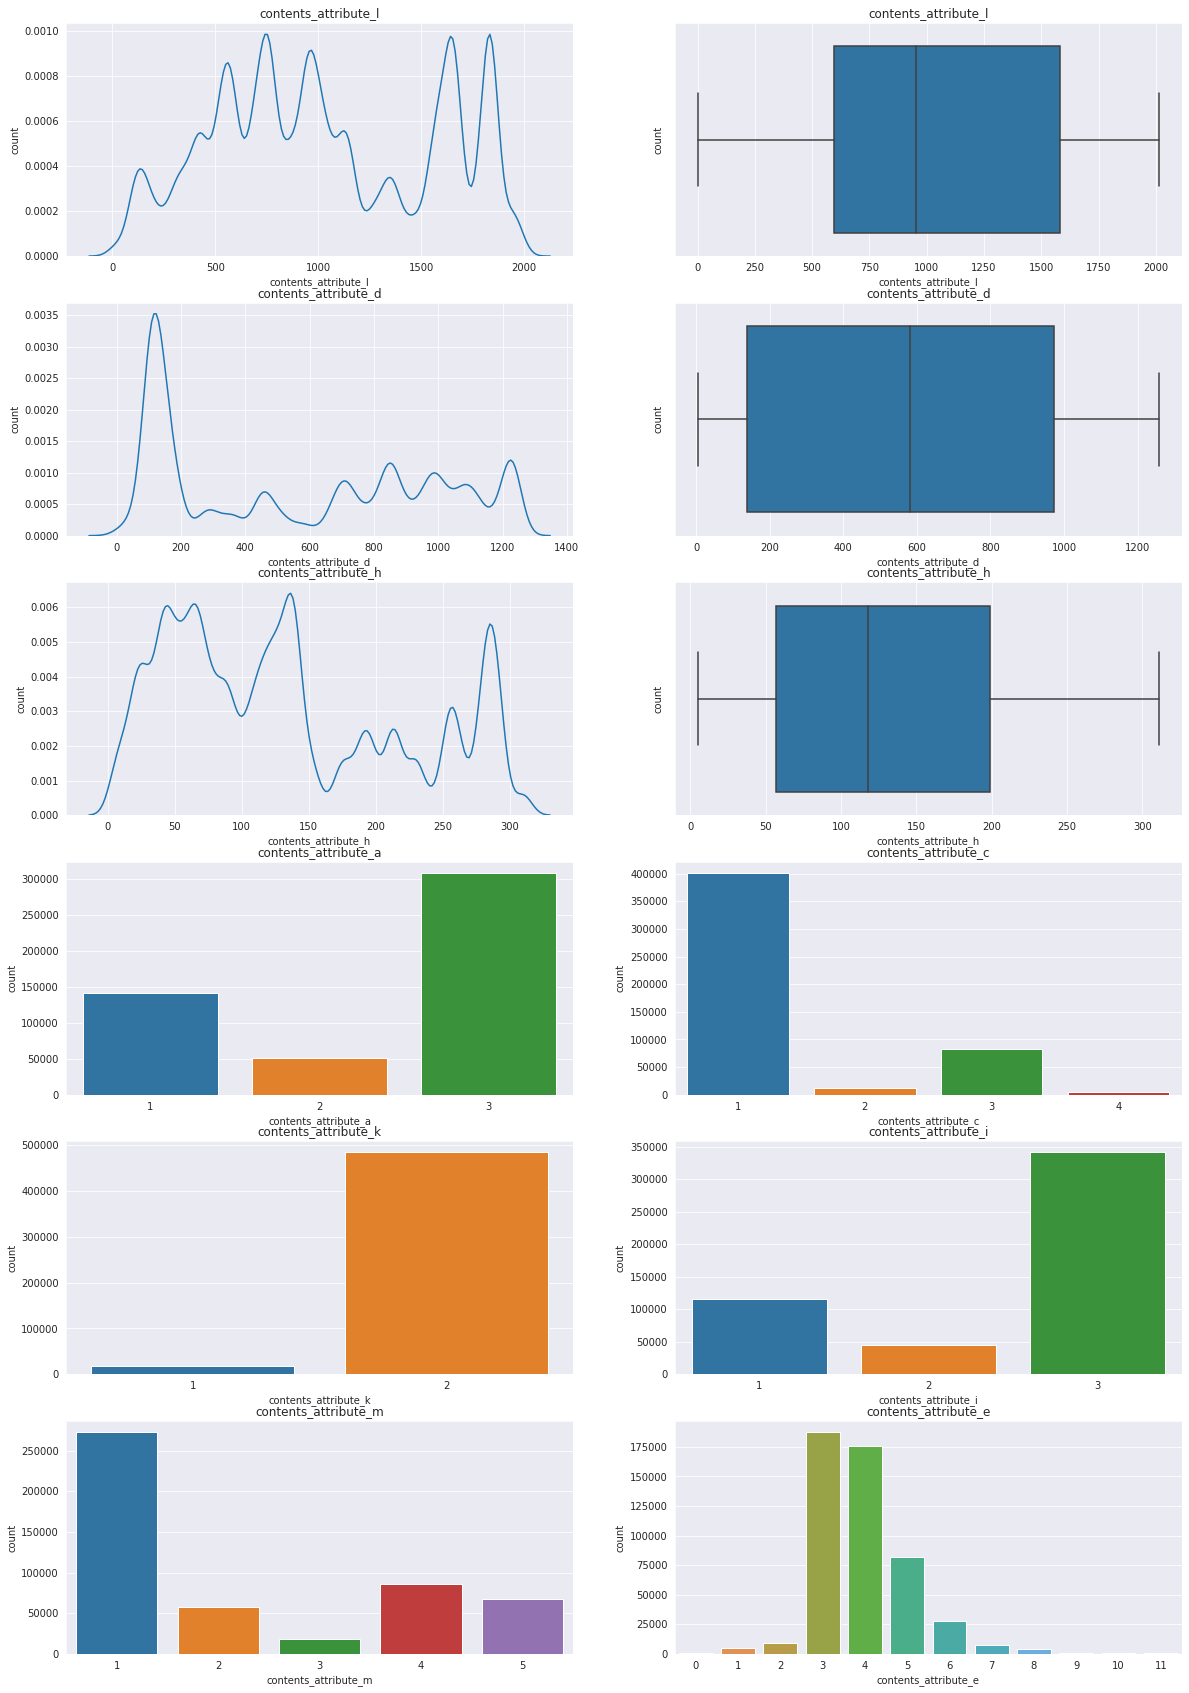

In [ ]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) =plt.subplots(nrows=6,ncols=2)
figure.set_size_inches(20,30)

sns.kdeplot(train["contents_attribute_l"], ax=ax1)
sns.boxplot(train["contents_attribute_l"], ax=ax2)

sns.kdeplot(train["contents_attribute_d"], ax=ax3)
sns.boxplot(train["contents_attribute_d"], ax=ax4)

sns.kdeplot(train["contents_attribute_h"], ax=ax5)
sns.boxplot(train["contents_attribute_h"], ax=ax6)

sns.countplot(train["contents_attribute_a"], ax=ax7)
sns.countplot(train["contents_attribute_c"], ax=ax8)
sns.countplot(train["contents_attribute_k"], ax=ax9)
sns.countplot(train["contents_attribute_i"], ax=ax10)
sns.countplot(train["contents_attribute_m"], ax=ax11)
sns.countplot(train["contents_attribute_e"], ax=ax12)

ax1.set(ylabel='count', title ="contents_attribute_l")
ax2.set(ylabel='count', title ="contents_attribute_l")
ax3.set(ylabel='count', title ="contents_attribute_d")
ax4.set(ylabel='count', title ="contents_attribute_d")
ax5.set(ylabel='count', title ="contents_attribute_h")
ax6.set(ylabel='count', title ="contents_attribute_h")
ax7.set(ylabel='count', title ="contents_attribute_a")
ax8.set(ylabel='count', title ="contents_attribute_c")
ax9.set(ylabel='count', title ="contents_attribute_k")
ax10.set(ylabel='count', title ="contents_attribute_i")
ax11.set(ylabel='count', title ="contents_attribute_m")
ax12.set(ylabel='count', title ="contents_attribute_e")

- contents_attribute_l :  컨텐츠 속성 L

- contents_attribute_d :  컨텐츠 속성 D

- contents_attribute_h :  컨텐츠 속성 H

--------------------

- contents_attribute_a :  컨텐츠 속성 A

- contents_attribute_c :  컨텐츠 속성 C

- contents_attribute_k :  컨텐츠 속성 K

- contents_attribute_i :  컨텐츠 속성 I

- contents_attribute_m :  컨텐츠 속성 M

- contents_attribute_e :  컨텐츠 속성 E

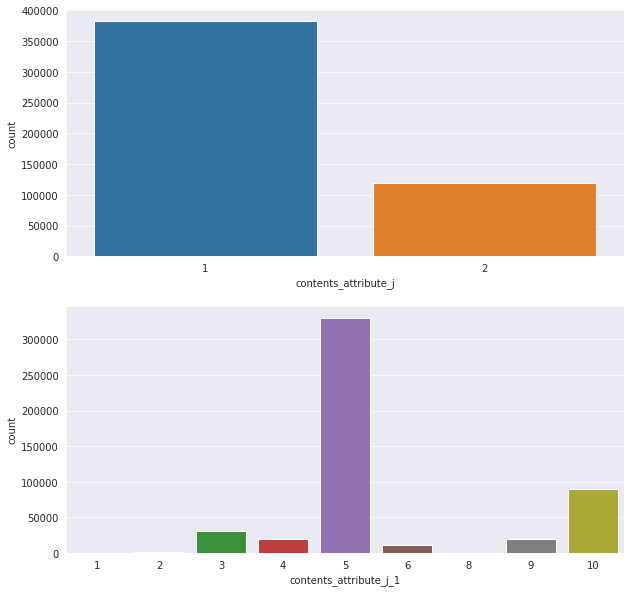

In [ ]:
figure, (ax1, ax2) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(10,10)

sns.countplot(train["contents_attribute_j"], ax=ax1)
sns.countplot(train["contents_attribute_j_1"], ax=ax2)

-  contents_attribute_j :  컨텐츠 속성 J

-  contents_attribute_j_1 :  컨텐츠 속성 J 하위 속성 1


In [ ]:
c1=train.loc[train["contents_attribute_j"]==1]
c2=train.loc[train["contents_attribute_j"]==2]

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'contents_attribute_j==2')]

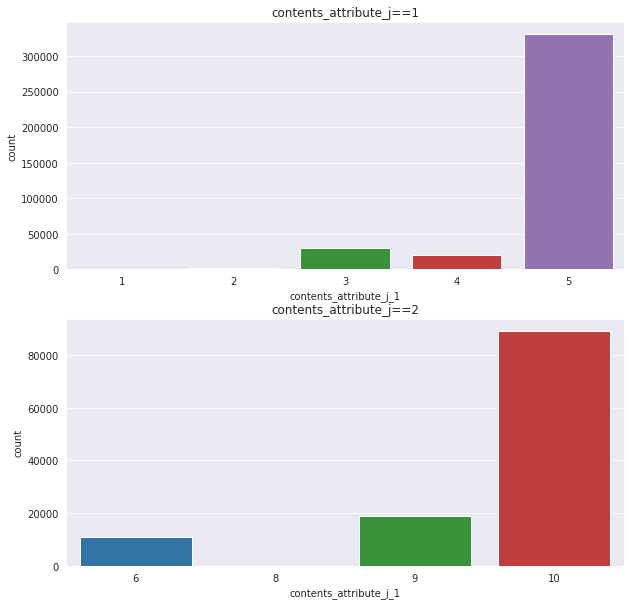

In [ ]:
figure, (ax1, ax2) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(10,10)

sns.countplot(c1["contents_attribute_j_1"], ax=ax1)
sns.countplot(c2["contents_attribute_j_1"], ax=ax2)

ax1.set(ylabel='count', title ="contents_attribute_j==1")
ax2.set(ylabel='count', title ="contents_attribute_j==2")

- contents_attribute_a==1 인 경우는 하위 속성이 1-5이고, contents_attribute_a==2 인 경우는 하위 속성이 6-10이다.

##사용자 번호

In [ ]:
print(len(train["person_rn"].unique())), print(len(train.index))

300177
501951


(None, None)

In [ ]:
from collections import Counter
cnt=Counter(train["person_rn"])
cnt.most_common(30)

[(627445, 20),
 (827703, 19),
 (1047079, 19),
 (241140, 19),
 (53891, 18),
 (1016996, 18),
 (139379, 17),
 (77829, 17),
 (217730, 17),
 (358803, 16),
 (314186, 16),
 (267877, 16),
 (633089, 15),
 (490691, 15),
 (366296, 15),
 (134513, 15),
 (430098, 15),
 (476761, 15),
 (658174, 15),
 (177296, 15),
 (255445, 15),
 (241017, 15),
 (352354, 15),
 (731067, 14),
 (891208, 14),
 (599796, 14),
 (508754, 14),
 (773826, 14),
 (347038, 14),
 (166961, 14)]

- 가장 많이 중복되는 사람의 경우 20번 중복

## 컨텐츠 번호

In [ ]:
print(len(train["contents_rn"].unique())), print(len(train.index))

283359
501951


(None, None)

In [ ]:
cnt=Counter(train["contents_rn"])
cnt.most_common(30)

[(22078, 39),
 (76824, 36),
 (138209, 32),
 (72025, 29),
 (402922, 28),
 (135258, 24),
 (87102, 23),
 (105913, 23),
 (13448, 23),
 (3441, 23),
 (64276, 23),
 (266573, 22),
 (668672, 22),
 (363371, 22),
 (135857, 22),
 (155644, 22),
 (285326, 21),
 (78253, 20),
 (155428, 20),
 (141212, 20),
 (105233, 20),
 (356712, 20),
 (93664, 20),
 (716686, 19),
 (111711, 19),
 (139824, 19),
 (93782, 19),
 (57412, 19),
 (80966, 19),
 (164609, 19)]

- 가장 많이 중복된 컨텐츠의 경우 39번

## 컨텐츠 열람 일시

In [ ]:
print(train["contents_open_dt"].max()), print(train["contents_open_dt"].min())

2020-11-30 23:59:56
2020-01-01 00:01:03


(None, None)

In [ ]:
train["time"]=train["contents_open_dt"].dt.strftime("%m%d%H")
train["month"]=train["contents_open_dt"].dt.strftime("%m")
train["date"]=train["contents_open_dt"].dt.strftime("%d")
train["hour"]=train["contents_open_dt"].dt.strftime("%H")
train["day"]=train["contents_open_dt"].dt.strftime("%A")

train["time"]=train["time"].astype(int)
train["month"]=train["month"].astype(int)
train["date"]=train["date"].astype(int)
train["hour"]=train["hour"].astype(int)

[Text(0, 0.5, 'target'), Text(0.5, 1.0, 'day')]

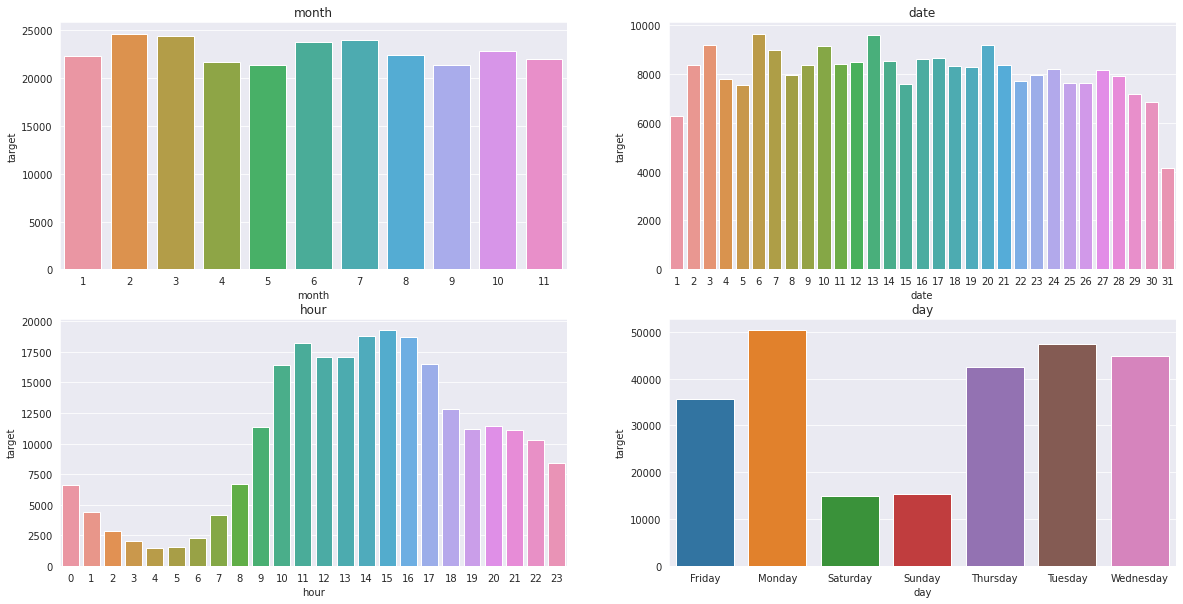

In [ ]:
figure, ((ax1, ax2), (ax3, ax4)) =plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,10)

month=train.groupby("month")["target"].sum().reset_index().reset_index()
date=train.groupby("date")["target"].sum().reset_index().reset_index()
hour=train.groupby("hour")["target"].sum().reset_index().reset_index()
day=train.groupby("day")["target"].sum().reset_index().reset_index()

sns.barplot(data=month, x="month", y="target", ax=ax1)
sns.barplot(data=date, x="date", y="target", ax=ax2)
sns.barplot(data=hour, x="hour", y="target", ax=ax3)
sns.barplot(data=day, x="day", y="target", ax=ax4)

sns.set_style("darkgrid")
ax1.set(ylabel='target', title ="month")
ax2.set(ylabel='target', title ="date")
ax3.set(ylabel='target', title ="hour")
ax4.set(ylabel='target', title ="day")

- 낮시간이 컨텐츠 사용 여부가 가장 높으며
- 월요일이 컨텐츠 사용 여부가 가장 높음

In [ ]:
for i in range(1,7):
  name=train.columns[i]
  train[name]=train[name].apply(lambda x:1 if x=="T" else 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

train["match_yn"]=le.fit_transform(train["match_yn"])
train["match_yn_d"]=le.fit_transform(train["match_yn_d"])
train["match_yn_h"]=le.fit_transform(train["match_yn_h"])

In [ ]:
train.drop("contents_open_dt", axis=1, inplace=True)

In [ ]:
train["day"]=le.fit_transform(train["day"])

##D, H, L 데이터 EDA

**D**

In [ ]:
D

,속성 D 코드,속성 D 세분류코드,속성 D 소분류코드,속성 D 중분류코드,속성 D 대분류코드
0,4,4,3,2,1
1,5,5,3,2,1
2,7,7,6,2,1
3,8,8,6,2,1
4,9,8,6,2,1
...,...,...,...,...,...
1109,1254,1254,1254,1235,1235
1110,1255,1254,1254,1235,1235
1111,1256,1254,1254,1235,1235
1112,1257,1254,1254,1235,1235


In [ ]:
print(len(D.index))
print(len(set(D["속성 D 코드"].unique())))
print(len(set(D["속성 D 세분류코드"].unique())))
print(len(set(D["속성 D 소분류코드"].unique())))
print(len(set(D["속성 D 중분류코드"].unique())))
print(len(set(D["속성 D 대분류코드"].unique())))

1114
1114
451
137
36
11


- 속성 D코드와 속성 D 세분류 코드는 인덱스와 개수가 같음.

- 속성 소분류, 중분류, 대분류를 train 데이터와 병합

- 회원 속성 D의 3가지는 전부 bool 연산으로, True==1, False==2로 이루어져있음. 어떻게 매핑을 시켜야 할까?

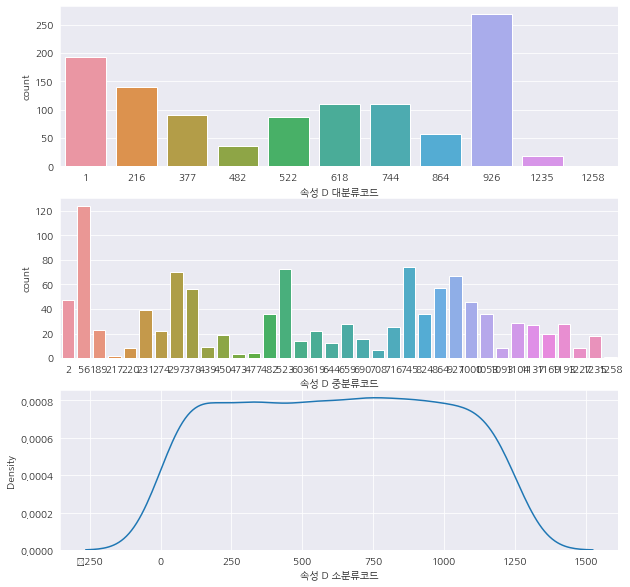

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1), (ax2), (ax3)) =plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(10,10)

sns.countplot(D['속성 D 대분류코드'], ax=ax1)
sns.countplot(D['속성 D 중분류코드'], ax=ax2)
sns.kdeplot(D['속성 D 소분류코드'], ax=ax3)

- 속성 D의 경우 대분류, 세분류, 코드 매칭 여부는 총 8가지의 경우의 수가 있는게 4개가 나옴.

- 속성 D의 경우 대분류, 세분류, 코드 매칭 여부에 컨텐츠 사용 여부(라벨)까지 추가하면  총 16가지의 경우의 수가 있는게 8개가 나옴.

- 초반에 heatmap으로 이들의 상관관계를 살펴보았을 때, 속성D코드 데이터의 칼럼끼리의 상관관계가 매우 높았엇음.

-----------------

**참가자_제공 레이아웃 설명**

> 칼럼명
- d_l_match_yn $\rightarrow$ 회원 선호 속성 D 1번 대분류코드와 컨텐츠 속성 D  대분류코드가 동일한지에 대한 여부
- d_m_match_yn $\rightarrow$ 회원 선호 속성 D 1번 세분류코드와 컨텐츠 속성 D 세분류코드가 동일한지에 대한 여부
- d_s_match_yn $\rightarrow$ 회원 선호 속성 D 1번 코드와 컨텐츠 속성 D 코드가 동일한지에 대한 여부


> 회원 선호 속성 D 1번
- person_attribute_d_1 (대분류)

> 컨텐츠 속성 D
- contents_attribute_d (대분류)



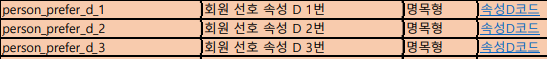

image.png

In [ ]:
train["person_prefer_d_1"].describe()

count    501951.000000
mean        537.296399
std         411.441926
min           4.000000
25%         117.000000
50%         453.000000
75%         935.000000
max        1258.000000
Name: person_prefer_d_1, dtype: float64

In [ ]:
train["contents_attribute_d"].describe()

count    501951.000000
mean        581.505215
std         413.915756
min           4.000000
25%         138.000000
50%         581.000000
75%         974.000000
max        1258.000000
Name: contents_attribute_d, dtype: float64

In [ ]:
D["속성 D 코드"].describe()

count    1114.000000
mean      627.250449
std       361.091553
min         4.000000
25%       313.250000
50%       628.500000
75%       937.750000
max      1258.000000
Name: 속성 D 코드, dtype: float64

**회원 속성과 속성D코드 비교**

In [ ]:
print("person_prefer_d_1 원소 개수 :", len(set(train["person_prefer_d_1"])))
print("속성 D 코드 원소 개수",len(set(D["속성 D 코드"])))

person_prefer_d_1 원소 개수 : 1093
속성 D 코드 원소 개수 1114


In [ ]:
print("교집합 :", len(set(D["속성 D 코드"])&set(train["person_prefer_d_1"])))

교집합 : 1093


In [ ]:
print("속성 D 코드 원소집합 - person_prefer_d_1 원소집합 :", len(set(D["속성 D 코드"])-set(train["person_prefer_d_1"])))

속성 D 코드 원소집합 - person_prefer_d_1 원소집합 : 21


In [ ]:
print("person_prefer_d_1 원소집합-속성 D 코드 원소집합 :", len(set(train["person_prefer_d_1"])-set(D["속성 D 코드"])))

person_prefer_d_1 원소집합-속성 D 코드 원소집합 : 0


**person_prefer_d_1 $\subset$ 속성 D 코드**

**컨텐츠 속성과 속성D코드 비교**

In [ ]:
print("contents_attribute_d 원소 개수 :", len(set(train["contents_attribute_d"])))
print("속성 D 코드 원소 개수",len(set(D["속성 D 코드"])))

contents_attribute_d 원소 개수 : 1065
속성 D 코드 원소 개수 1114


In [ ]:
print("교집합 :", len(set(D["속성 D 코드"])&set(train["contents_attribute_d"])))

교집합 : 1065


In [ ]:
print("속성 D 코드 원소집합 - contents_attribute_d 원소집합 :", len(set(D["속성 D 코드"])-set(train["contents_attribute_d"])))

속성 D 코드 원소집합 - contents_attribute_d 원소집합 : 49


In [ ]:
print("contents_attribute_d 원소집합-속성 D 코드 원소집합 :", len(set(train["contents_attribute_d"])-set(D["속성 D 코드"])))

contents_attribute_d 원소집합-속성 D 코드 원소집합 : 0


**contents_attribute_d $\subset$ 속성 D 코드**

In [ ]:
train["속성 D 코드"]=train["contents_attribute_d"]

In [ ]:
train=pd.merge(train, D, how='inner', on='속성 D 코드')

> 왜 contents attribute로 merge?

- 속성L코드의 경우 회원속성에 없음. 따라서, 속성D코드, 속성H코드, 속성L코드 3개 전부 컨텐츠 속성으로 판단 됨

**H**

In [ ]:
train["person_prefer_h_1"].describe()

count    501951.000000
mean        116.394919
std          91.032989
min           2.000000
25%          44.000000
50%          95.000000
75%         189.000000
max         313.000000
Name: person_prefer_h_1, dtype: float64

In [ ]:
train["contents_attribute_h"].describe()

count    501951.000000
mean        132.530916
std          87.142309
min           5.000000
25%          57.000000
50%         118.000000
75%         199.000000
max         311.000000
Name: contents_attribute_h, dtype: float64

In [ ]:
H["속성 H 코드"].describe()

count    294.000000
mean     158.183673
std       89.885405
min        2.000000
25%       81.250000
50%      158.500000
75%      235.750000
max      314.000000
Name: 속성 H 코드, dtype: float64

**회원 속성과 속성H코드 비교**

In [ ]:
print("person_prefer_H_1 원소 개수 :", len(set(train["person_prefer_h_1"])))
print("속성 H 코드 원소 개수",len(set(H["속성 H 코드"])))

person_prefer_H_1 원소 개수 : 279
속성 H 코드 원소 개수 294


In [ ]:
print("교집합 :", len(set(H["속성 H 코드"])&set(train["person_prefer_h_1"])))

교집합 : 279


In [ ]:
print("속성 H 코드 원소집합 - person_prefer_h_1 원소집합 :", len(set(H["속성 H 코드"])-set(train["person_prefer_h_1"])))

속성 H 코드 원소집합 - person_prefer_h_1 원소집합 : 15


In [ ]:
print("person_prefer_h_1 원소집합-속성 H 코드 원소집합 :", len(set(train["person_prefer_h_1"])-set(H["속성 H 코드"])))

person_prefer_h_1 원소집합-속성 H 코드 원소집합 : 0


**person_prefer_h_1 $\subset$ 속성 H 코드**

**컨텐츠 속성과 속성H코드 비교**

In [ ]:
print("contents_attribute_h 원소 개수 :", len(set(train["contents_attribute_h"])))
print("속성 H 코드 원소 개수",len(set(H["속성 H 코드"])))

contents_attribute_h 원소 개수 : 250
속성 H 코드 원소 개수 294


In [ ]:
print("교집합 :", len(set(H["속성 H 코드"])&set(train["contents_attribute_h"])))

교집합 : 250


In [ ]:
print("속성 H 코드 원소집합 - contents_attribute_h 원소집합 :", len(set(H["속성 H 코드"])-set(train["contents_attribute_h"])))

속성 H 코드 원소집합 - contents_attribute_h 원소집합 : 44


In [ ]:
print("contents_attribute_h 원소집합-속성 H 코드 원소집합 :", len(set(train["contents_attribute_h"])-set(H["속성 H 코드"])))

contents_attribute_h 원소집합-속성 H 코드 원소집합 : 0


**contents_attribute_h $\subset$ 속성 H 코드**

In [ ]:
train["속성 H 코드"]=train["contents_attribute_h"]

In [ ]:
train=pd.merge(train, H, how='inner', on='속성 H 코드')

**L**

In [ ]:
L

,속성 L 코드,속성 L 세분류코드,속성 L 소분류코드,속성 L 중분류코드,속성 L 대분류코드
0,1,1,1,1,2004
1,2,2,2,1,2004
2,3,3,2,1,2004
3,4,3,2,1,2004
4,5,5,2,1,2004
...,...,...,...,...,...
2020,2021,2021,2021,2021,2021
2021,2022,2022,2022,2022,2022
2022,2023,2023,2023,2023,2023
2023,2024,2024,2024,2024,2024


In [ ]:
print("contents_attribute_l 원소 개수 :", len(set(train["contents_attribute_l"])))
print("속성 L 코드 원소 개수",len(set(L["속성 L 코드"])))

contents_attribute_l 원소 개수 : 1752
속성 L 코드 원소 개수 2025


In [ ]:
print("교집합 :", len(set(L["속성 L 코드"])&set(train["contents_attribute_l"])))

교집합 : 1752


In [ ]:
print("속성 L 코드 원소집합 - contents_attribute_l 원소집합 :", len(set(L["속성 L 코드"])-set(train["contents_attribute_l"])))

속성 L 코드 원소집합 - contents_attribute_l 원소집합 : 273


In [ ]:
print("contents_attribute_l 원소집합-속성 L 코드 원소집합 :", len(set(train["contents_attribute_l"])-set(L["속성 L 코드"])))

contents_attribute_l 원소집합-속성 L 코드 원소집합 : 0


**contents_attribute_l $\subset$ 속성 L 코드**

In [ ]:
train["속성 L 코드"]=train["contents_attribute_l"]

In [ ]:
train=pd.merge(train, L, how='inner', on='속성 L 코드')

In [ ]:
train

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,match_yn,match_yn_d,match_yn_h,time,month,date,hour,day,속성 D 코드,속성 D 세분류코드_x,속성 D 소분류코드_x,속성 D 중분류코드_x,속성 D 대분류코드_x,속성 H 코드,속성 H 중분류코드_x,속성 H 대분류코드_x,속성 D 세분류코드_y,속성 D 소분류코드_y,속성 D 중분류코드_y,속성 D 대분류코드_y,속성 H 중분류코드_y,속성 H 대분류코드_y,속성 L 코드,속성 L 세분류코드,속성 L 소분류코드,속성 L 중분류코드,속성 L 대분류코드
0,0,1,1,1,2,2,2,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1,12,3,0,11712,1,17,12,0,275,275,274,274,216,139,316,3,275,274,274,216,422,94,1608,1607,1606,1605,2016
1,331621,1,1,1,2,2,2,1,7,3,5,275,370,369,8,1,1,26,2,25,3,1,10,2,1,2,1608,275,1,3,139,11046,330640,0,12,3,0,50413,5,4,13,1,275,275,274,274,216,139,338,3,275,274,274,216,422,94,1608,1607,1606,1605,2016
2,133244,1,1,1,2,2,2,1,6,5,5,281,276,277,6,1,1,4,95,59,3,1,5,1,1,2,1608,281,5,7,139,633027,334792,1,12,3,0,80510,8,5,10,6,281,276,274,274,216,139,316,3,276,274,274,216,422,94,1608,1607,1606,1605,2016
3,37130,2,2,2,1,1,1,1,4,2,5,514,464,122,4,1,1,139,96,116,1,3,10,2,3,2,1608,281,4,5,139,560417,377296,0,3,0,3,113021,11,30,21,1,281,514,509,482,482,139,422,94,276,274,274,216,422,94,1608,1607,1606,1605,2016
4,202316,1,2,2,1,2,2,1,3,4,1,275,370,369,8,1,1,96,131,139,3,1,5,1,1,2,1608,281,5,7,139,550822,334792,1,5,1,1,80314,8,3,14,1,281,275,274,274,216,139,399,94,276,274,274,216,422,94,1608,1607,1606,1605,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,461455,2,2,2,2,2,2,2,0,3,3,90,181,102,4,1,1,59,95,4,3,2,4,1,1,2,1863,682,1,4,162,817971,569972,1,0,0,0,51207,5,12,7,5,682,90,83,56,1,162,368,58,679,677,659,618,444,149,1863,1863,1853,1852,2021
501947,352731,1,1,1,2,2,2,1,6,2,5,851,857,1228,5,1,1,72,246,233,1,3,5,1,1,2,67,851,3,5,221,856376,604712,0,12,3,0,40819,4,8,19,6,851,847,847,824,744,221,379,71,847,847,824,744,490,208,67,67,67,67,2005
501948,224676,1,1,1,2,2,2,1,4,2,1,851,857,1228,4,1,1,281,288,279,3,3,5,1,1,2,67,851,1,3,221,292663,601525,0,12,3,0,12011,1,20,11,1,851,847,847,824,744,221,543,277,847,847,824,744,490,208,67,67,67,67,2005
501949,313755,2,2,2,1,2,2,2,6,2,5,1228,867,968,6,1,1,209,210,213,1,3,5,1,1,2,67,851,3,5,221,869377,604712,0,1,0,1,40119,4,1,19,6,851,1227,1227,1227,926,221,480,208,847,847,824,744,490,208,67,67,67,67,2005


# 1차 모델링

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/train_1.csv")

In [ ]:
!pip install catboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import f1_score

In [ ]:
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)
cb = CatBoostClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#train.to_csv("train_1.csv", index=False)

In [ ]:
x=train.drop("target", axis=1)
y=train[["target"]]

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
def make_result(model, x_train, x_test, y_train, y_test):
  model.fit(x_train, y_train)
  y_pred=lgbm.predict(x_test)
  train_score=lgbm.score(x_train, y_train)
  test_score=lgbm.score(x_test, y_test)
  f_1=f1_score(y_test, y_pred)
  print(train_score, test_score, f_1)

LGBM

In [ ]:
make_result(lgbm, x_train, x_test, y_train, y_test)

0.7251444366968821 0.7204729507625186 0.6661114151774029


XGBOOST

In [ ]:
make_result(xgb, x_train, x_test, y_train, y_test)

0.7251444366968821 0.7204729507625186 0.6661114151774029


CATBOOST

In [ ]:
cb = CatBoostClassifier(random_state=42)
cb.fit(x_train, y_train)
y_pred=cb.predict(x_test)
train_score=cb.score(x_train, y_train)
test_score=cb.score(x_test, y_test)
f_1=f1_score(y_test, y_pred)
print(train_score, test_score, f_1)

In [ ]:
print(train_score, test_score, f_1)

0.753835043331009 0.7260411789901485 0.6841603601327529


GRADIENT BOOST

In [ ]:
make_result(gb, x_train, x_test, y_train, y_test)

0.7251444366968821 0.7204729507625186 0.6661114151774029


RANDOMFOREST

In [ ]:
make_result(rf, x_train, x_test, y_train, y_test)

0.7251444366968821 0.7204729507625186 0.6661114151774029


- 세션이 종료되었으므로, 주피터로 작업환경 변경